In [23]:
import pandas as pd

df = pd.read_csv('./content/all-data.csv', encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [24]:
df.isnull().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
!pip install textblob
from textblob import TextBlob

In [27]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['TextBlob_Sentiment'] = df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].apply(get_sentiment)
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",TextBlob_Sentiment
0,neutral,Technopolis plans to develop in stages an area...,positive
1,negative,The international electronic industry company ...,neutral
2,positive,With the new production plant the company woul...,negative
3,positive,According to the company 's updated strategy f...,neutral
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive


In [28]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
sid = SentimentIntensityAnalyzer()

def get_nltk_sentiment(text):
    score = sid.polarity_scores(text)
    if score['compound'] > 0:
        return 'positive'
    elif score['compound'] == 0:
        return 'neutral'
    else:
        return 'negative'

df['NLTK_Sentiment'] = df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].apply(get_nltk_sentiment)
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",TextBlob_Sentiment,NLTK_Sentiment
0,neutral,Technopolis plans to develop in stages an area...,positive,negative
1,negative,The international electronic industry company ...,neutral,neutral
2,positive,With the new production plant the company woul...,negative,positive
3,positive,According to the company 's updated strategy f...,neutral,positive
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,positive


In [30]:
!pip install transformers
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [31]:
def get_transformer_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'].lower()

df['Transformer_Sentiment'] = df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].apply(get_transformer_sentiment)
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",TextBlob_Sentiment,NLTK_Sentiment,Transformer_Sentiment
0,neutral,Technopolis plans to develop in stages an area...,positive,negative,positive
1,negative,The international electronic industry company ...,neutral,neutral,negative
2,positive,With the new production plant the company woul...,negative,positive,positive
3,positive,According to the company 's updated strategy f...,neutral,positive,positive
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,positive,positive


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

true_labels = df['neutral']

textblob_accuracy = accuracy_score(true_labels, df['TextBlob_Sentiment'])
nltk_accuracy = accuracy_score(true_labels, df['NLTK_Sentiment'])
transformer_accuracy = accuracy_score(true_labels, df['Transformer_Sentiment'])

print(f"TextBlob Accuracy: {textblob_accuracy}")
print(f"NLTK Accuracy: {nltk_accuracy}")
print(f"Transformer Accuracy: {transformer_accuracy}")

TextBlob Accuracy: 0.49102167182662537
NLTK Accuracy: 0.542827657378741
Transformer Accuracy: 0.29886480908152735


In [36]:
textblob_precision = precision_score(true_labels, df['TextBlob_Sentiment'], average='weighted', zero_division=0)
textblob_recall = recall_score(true_labels, df['TextBlob_Sentiment'], average='weighted', zero_division=0)
textblob_f1 = f1_score(true_labels, df['TextBlob_Sentiment'], average='weighted', zero_division=0)

nltk_precision = precision_score(true_labels, df['NLTK_Sentiment'], average='weighted', zero_division=0)
nltk_recall = recall_score(true_labels, df['NLTK_Sentiment'], average='weighted', zero_division=0)
nltk_f1 = f1_score(true_labels, df['NLTK_Sentiment'], average='weighted', zero_division=0)

transformer_precision = precision_score(true_labels, df['Transformer_Sentiment'], average='weighted', zero_division=0)
transformer_recall = recall_score(true_labels, df['Transformer_Sentiment'], average='weighted', zero_division=0)
transformer_f1 = f1_score(true_labels, df['Transformer_Sentiment'], average='weighted', zero_division=0)

print(f"TextBlob Precision: {textblob_precision}")
print(f"TextBlob Recall: {textblob_recall}")
print(f"TextBlob F1-Score: {textblob_f1}")

print(f"NLTK Precision: {nltk_precision}")
print(f"NLTK Recall: {nltk_recall}")
print(f"NLTK F1-Score: {nltk_f1}")

print(f"Transformer Precision: {transformer_precision}")
print(f"Transformer Recall: {transformer_recall}")
print(f"Transformer F1-Score: {transformer_f1}")

TextBlob Precision: 0.5158640992341138
TextBlob Recall: 0.49102167182662537
TextBlob F1-Score: 0.5000183345356628
NLTK Precision: 0.6088624279257682
NLTK Recall: 0.542827657378741
NLTK F1-Score: 0.5494790854468365
Transformer Precision: 0.132448510353231
Transformer Recall: 0.29886480908152735
Transformer F1-Score: 0.17764208600541892


In [34]:
for index, row in df.iterrows():
    print(f"Text: {row['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .']}")
    print(f"TextBlob Sentiment: {row['TextBlob_Sentiment']}")
    print(f"NLTK Sentiment: {row['NLTK_Sentiment']}")
    print(f"Transformer Sentiment: {row['Transformer_Sentiment']}")
    print()

Streaming output truncated to the last 5000 lines.
Text: The expansion is to be finalized in the autumn of 2009 .
TextBlob Sentiment: neutral
NLTK Sentiment: neutral
Transformer Sentiment: positive

Text: The expansion will be delivered in the fourth quarter of 2006 .
TextBlob Sentiment: neutral
NLTK Sentiment: neutral
Transformer Sentiment: positive

Text: The facility consists of a seven year bullet term loan of 200 mln euro $ 292.4 mln and a 150 mln euro $ 219.3 mln five year revolving credit facility .
TextBlob Sentiment: neutral
NLTK Sentiment: positive
Transformer Sentiment: negative

Text: The facility will have a lettable area of some 19,000 sq m. The plot for the plant , located in the Ratasmaki business park , will be purchased from the City of Forssa .
TextBlob Sentiment: neutral
NLTK Sentiment: neutral
Transformer Sentiment: negative

Text: The figure does not include food exports from Finland .
TextBlob Sentiment: neutral
NLTK Sentiment: neutral
Transformer Sentiment: nega

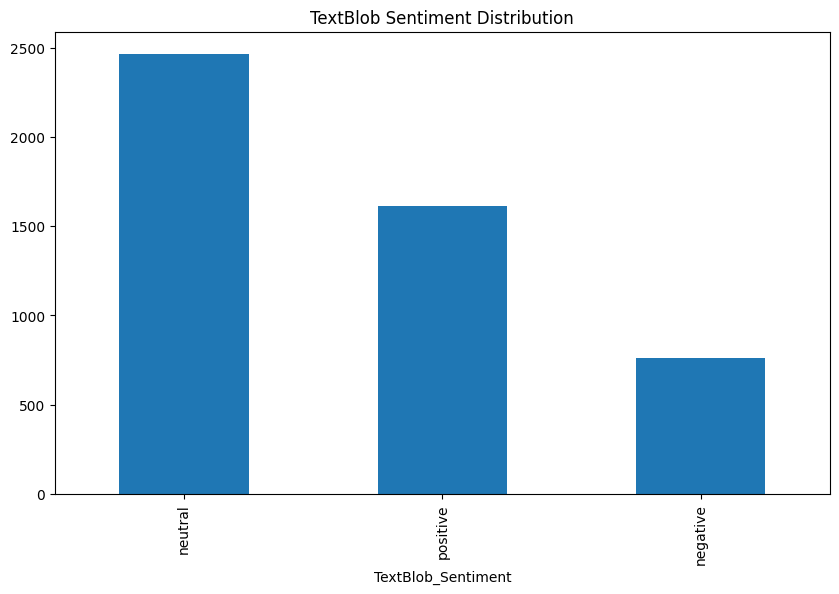

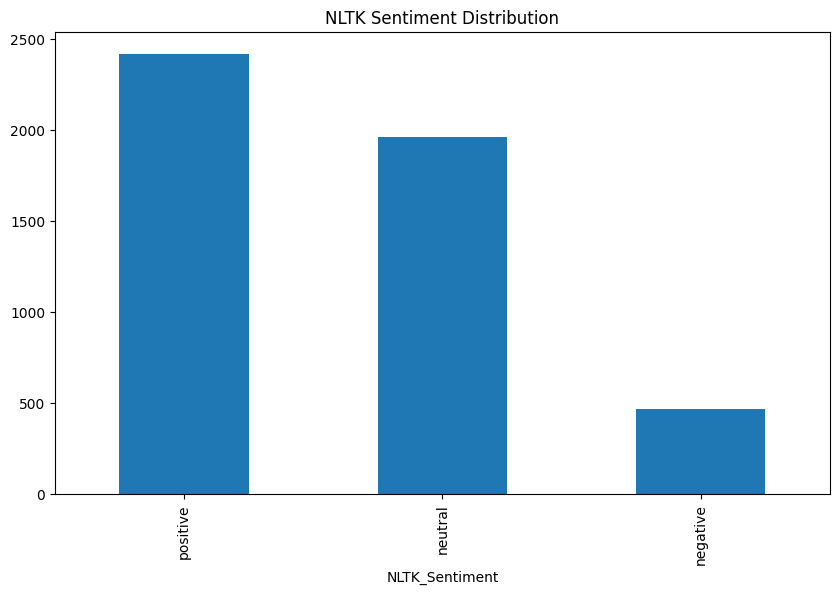

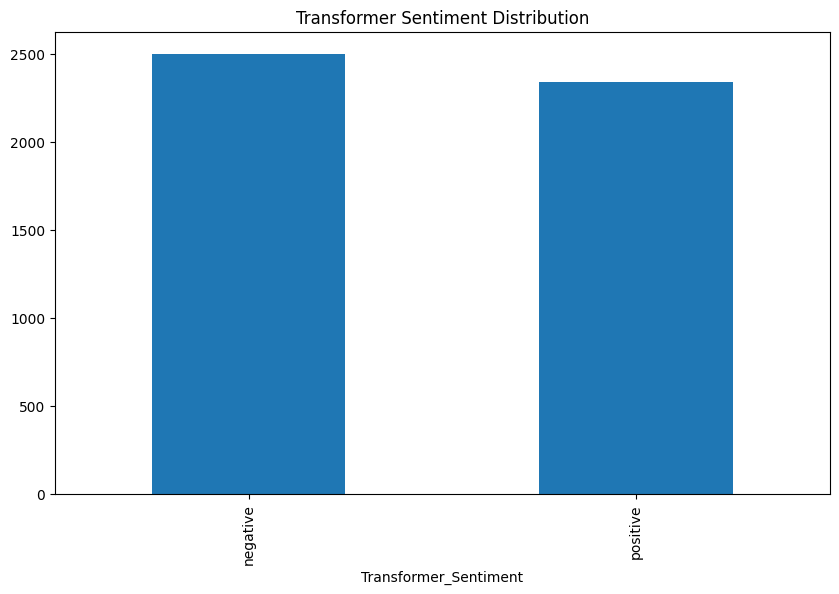

In [35]:
# Just for Observations:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['TextBlob_Sentiment'].value_counts().plot(kind='bar', title='TextBlob Sentiment Distribution')
plt.show()

plt.figure(figsize=(10, 6))
df['NLTK_Sentiment'].value_counts().plot(kind='bar', title='NLTK Sentiment Distribution')
plt.show()

plt.figure(figsize=(10, 6))
df['Transformer_Sentiment'].value_counts().plot(kind='bar', title='Transformer Sentiment Distribution')
plt.show()
